# The Monty Hall Problem

The **Monty Hall problem** is a problem in conditional probability that is famous for having a counterintuitive solution.

Imagine you are a contestant in a game show, and are faced with three closed doors. Behind one of them is a car, but behind the other two are goats. If you pick the door with the car behind it, you win the game.

In [ ]:
#picture

Say you pick door number 1. the host knows what is behind the doors, and opens one of the two doors you did not pick, revealing a goat. You are given a choice: you can **stick** with the door you chose originally, or you can **switch** to the  other closed door. Which do you pick?

In [ ]:
#picture

Intuitively, it shouldn't matter if you choose to stick or to switch. There are now two possible doors that the car could be behind, so the chances must be 50/50, right?

Actually, you have a better chance of winning if you choose to **switch**. Why is this?

When you choose the door number 1, there is a 1 in 3 chance of the car being behind the door you picked, and a 2 in 3 chance of the car being behind one of the other two doors. Now the host reveals a goat behind door number 3. This shouldn't affect the chance of the car being behind door number 1, since you already knew that there must be at least one goat behind the other doors. The chance of the car being behind door number 1 is still $\frac{1}{3}$.

We know that the car must be behind one of the doors, so total probability of the car being behind door 1, 2 or 3 is $\frac{1}{3} + \frac{1}{3} + \frac{1}{3}$, or 100%.

There is a $\frac{1}{3}$ chance of the car being behind door number 1, and a $\frac{0}{3}$ chance of the car being behind door number 3, since the host showed that it was a goat.

So, the remaining $\frac{2}{3}$ chance must all apply to door number 2! Therefore, **switching** will give you a $\frac{2}{3}$ chance of winning, and **staying** will give you a $\frac{1}{3}$ chance of winning.

### More Doors

If this solution still feels off, imagine the same problem, but with twenty doors instead of three. There is only one car, and behind the rest are goats.

In [15]:
from ipywidgets import widgets, Layout, Button, Box
from IPython.display import clear_output
from random import randint

wins = 0
losses = 0
turn = 0
chosen_door = None

#Randomizes the winning door for the first time:
winning_door = randint(0,2)

#Sets up the layout of the buttons and box
button_layout = Layout(height='100px', min_width='40px')
box_layout = Layout(justify_content = "center")

#Creates the buttons
button1 = widgets.Button(description = "Door 1", button_style = "primary", layout = button_layout)
button2 = widgets.Button(description = "Door 2", button_style = "primary", layout = button_layout)
button3 = widgets.Button(description = "Door 3", button_style = "primary", layout = button_layout)

buttons = [button1, button2, button3]

#Creates the box
button_box = Box(children = buttons, layout = box_layout)

#Displays the box with the buttons in it
display(button_box)

#Button event handlers, record the chosen door and calls monty_hall():
def button1_clicked(b):
    
    global chosen_door
    chosen_door = 0
    monty_hall()
    
def button2_clicked(b):
    
    global chosen_door
    chosen_door = 1
    monty_hall()
    
def button3_clicked(b):
    
    global chosen_door
    chosen_door = 2
    monty_hall() 

#Plays the Monty Hall Game repeatedly, and records wins:
def monty_hall():
    
    global turn, wins
    global losses
    global turn
    global chosen_door
    global winning_door
     
    #Clears the previous buttons and results
    clear_output()    
    
    #Move to the next turn, or reset to 0:
    #Turn 0 is the initial state, 1 is after player has chosen the first door and a goat has been revealed, 2 is final state of the game
    turn = (turn + 1)%3
    
    #TURN 0:
    if turn == 0:
        
        #Randomize the winning door:
        winning_door = randint(0,2)
        
        #Reset button color and labels:
        for door_number in range(0,3):
            num = door_number + 1
            buttons[door_number].description = f"Door {num}"
            buttons[door_number].button_style = "primary"
    
    #TURN 1:
    if turn == 1:
        
        #Change color of chosen door:
        buttons[chosen_door].button_style = "info"
        
        #Reveal one goat:
        for door_number in range(0,3):
            if winning_door != door_number and chosen_door != door_number:
                buttons[door_number].description = "Goat"
                buttons[door_number].button_style = "danger"
                break
                    
    #TURN 2:
    if turn == 2:
        
        #Reveal everything:
        for door_number in range(0,3):
            #For the winning door:
            if winning_door == door_number:
                buttons[door_number].description = "Car"
                buttons[door_number].button_style = "success"
            #For the losing doors:
            else:
                buttons[door_number].description = "Goat"
                buttons[door_number].button_style = "danger"
               
        #Recording wins and losses:
        if chosen_door == winning_door:
            wins += 1
            print("You won!")
            print("Press any button to try again.")
        else:
            losses += 1
            print("You lost.")
            print("Press any button to try again.")
                       
    
    #Re-displays the buttons
    display(button_box)
    
    #Prints the results
    print(f"Wins: {wins}")
    print(f"Losses: {losses}")
    if (wins + losses) != 0:
        percent = wins / (wins + losses)
    else:
        percent = 0
    print(f"Percentage of wins: {round(percent,3)*100}%")
    
    
button1.on_click(button1_clicked)
button2.on_click(button2_clicked)
button3.on_click(button3_clicked)

Box(children=(Button(button_style='primary', description='Door 1', layout=Layout(height='100px', min_width='40…

Wins: 3
Losses: 0
Percentage of wins: 100.0%


#### If you would like a visual explanation of the Monty Hall problem, please watch this video by Numberphile:

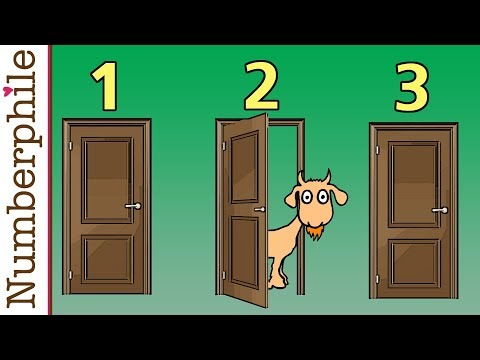

In [16]:
from IPython.display import YouTubeVideo
YouTubeVideo('4Lb-6rxZxx0')

**Sources:**

https://brilliant.org/wiki/monty-hall-problem/

https://www.youtube.com/watch?v=4Lb-6rxZxx0